# Time Series with Pandas Project Exercise

For this exercise, answer the questions below given the dataset: https://fred.stlouisfed.org/series/UMTMVS

This dataset is the Value of Manufacturers' Shipments for All Manufacturing Industries.

**Import any necessary libraries.**

In [1]:
# CODE HERE

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline

**Read in the data UMTMVS.csv file from the Data folder**

In [3]:
# CODE HERE

In [4]:
df = pd.read_csv('../Data/UMTMVS.csv')

**Check the head of the data**

In [5]:
# CODE HERE

In [6]:
df.head()

,DATE,UMTMVS
0,1992-01-01,209438.0
1,1992-02-01,232679.0
2,1992-03-01,249673.0
3,1992-04-01,239666.0
4,1992-05-01,243231.0


**Set the DATE column as the index.**

In [7]:
# CODE HERE

In [8]:
df.set_index('DATE',inplace=True)

In [9]:
df.head()

,UMTMVS
DATE,
1992-01-01,209438.0
1992-02-01,232679.0
1992-03-01,249673.0
1992-04-01,239666.0
1992-05-01,243231.0


**Check the data type of the index.**

In [10]:
# CODE HERE

In [11]:
df.index

Index(['1992-01-01', '1992-02-01', '1992-03-01', '1992-04-01', '1992-05-01',
       '1992-06-01', '1992-07-01', '1992-08-01', '1992-09-01', '1992-10-01',
       ...
       '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
       '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01', '2019-01-01'],
      dtype='object', name='DATE', length=325)

**Convert the index to be a datetime index. Note, there are many, many correct ways to do this!**

In [12]:
# CODE HERE

In [13]:
df.index = pd.to_datetime(df.index)

In [14]:
df.index

DatetimeIndex(['1992-01-01', '1992-02-01', '1992-03-01', '1992-04-01',
               '1992-05-01', '1992-06-01', '1992-07-01', '1992-08-01',
               '1992-09-01', '1992-10-01',
               ...
               '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01',
               '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01',
               '2018-12-01', '2019-01-01'],
              dtype='datetime64[ns]', name='DATE', length=325, freq=None)

**Plot out the data, choose a reasonable figure size**

In [15]:
# CODE HERE

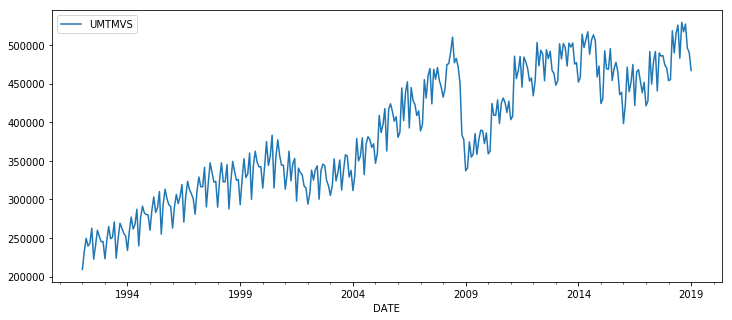

In [16]:
df.plot(figsize=(12,5))

**What was the percent increase in value from Jan 2009 to Jan 2019?**

In [17]:
#CODE HERE

In [18]:
100 * (df.loc['2019-01-01'] - df.loc['2009-01-01']) / df.loc['2009-01-01']

UMTMVS    38.472149
dtype: float64

**What was the percent decrease from Jan 2008 to Jan 2009?**

In [19]:
#CODE HERE

In [20]:
100 * (df.loc['2009-01-01'] - df.loc['2008-01-01']) / df.loc['2008-01-01']

UMTMVS   -22.022775
dtype: float64

**What is the month with the least value after 2005?** [HINT](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.idxmin.html)

In [21]:
#CODE HERE

In [22]:
df.loc['2005-01-01':].idxmin()

UMTMVS   2009-01-01
dtype: datetime64[ns]

**What 6 months have the highest value?**

In [23]:
# CODE HERE

In [24]:
df.sort_values(by='UMTMVS',ascending=False).head(5)

,UMTMVS
DATE,
2018-08-01,529157.0
2018-10-01,527031.0
2018-06-01,525660.0
2018-03-01,518285.0
2018-09-01,516992.0


**How many millions of dollars in value was lost in 2008? (Another way of posing this question is what was the value difference between Jan 2008 and Jan 2009)**

In [25]:
# CODE HERE

In [26]:
df.loc['2008-01-01'] - df.loc['2009-01-01']

UMTMVS    95206.0
dtype: float64

**Create a bar plot showing the average value in millions of dollars per year**

In [27]:
# CODE HERE

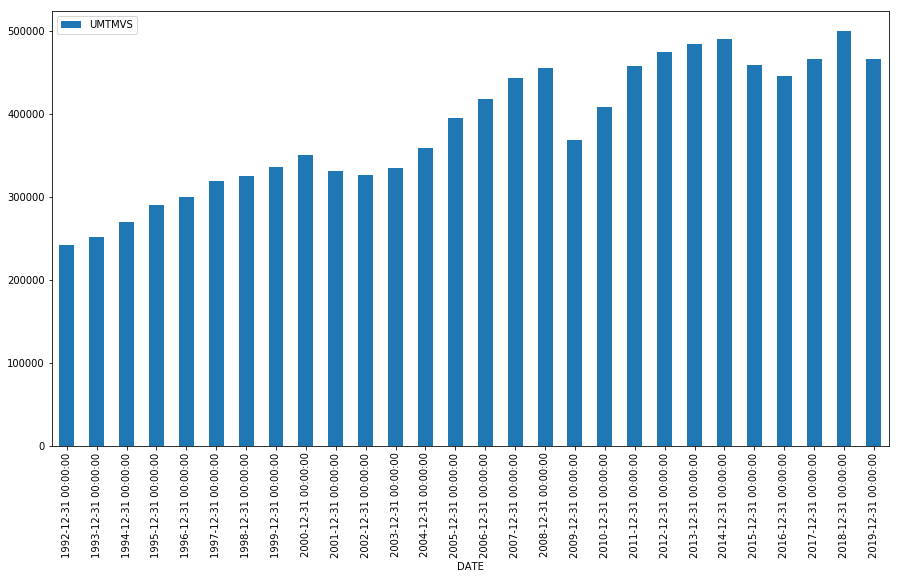

In [28]:
df.resample('Y').mean().plot.bar(figsize=(15,8))

**What year had the biggest increase in mean value from the previous year's mean value? (Lots of ways to get this answer!)**

[HINT for a useful method](https://pandas.pydata.org/pandas-docs/version/0.21/generated/pandas.DataFrame.idxmax.html)

In [29]:
# CODE HERE

In [30]:
yearly_data = df.resample('Y').mean()
yearly_data_shift = yearly_data.shift(1)

In [31]:
change = yearly_data - yearly_data_shift 
change

,UMTMVS
DATE,
1992-12-31,NaN
1993-12-31,9706.083333
1994-12-31,18134.583333
1995-12-31,20130.416667
1996-12-31,9792.583333
1997-12-31,19792.583333
1998-12-31,5426.166667
1999-12-31,11006.166667
2000-12-31,14724.750000


In [32]:
change['UMTMVS'].idxmax()

Timestamp('2011-12-31 00:00:00', freq='A-DEC')

**Plot out the yearly rolling mean on top of the original data. Recall that this is monthly data and there are 12 months in a year!**

In [33]:
# CODE HERE

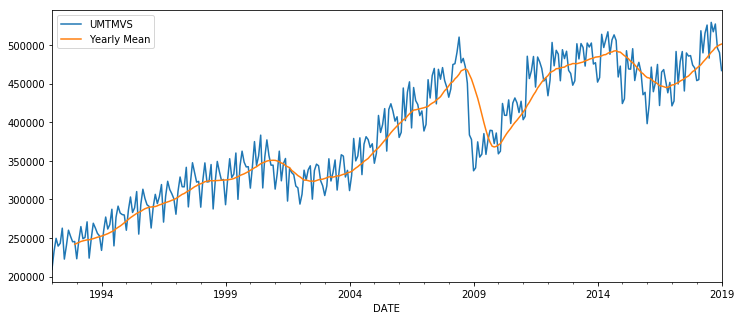

In [34]:
df['Yearly Mean'] = df['UMTMVS'].rolling(window=12).mean()
df[['UMTMVS','Yearly Mean']].plot(figsize=(12,5)).autoscale(axis='x',tight=True);

**BONUS QUESTION (HARD).**

**Some month in 2008 the value peaked for that year. How many months did it take to surpass that 2008 peak? (Since it crashed immediately after this peak) There are many ways to get this answer. NOTE: I get 70 months as my answer, you may get 69 or 68, depending on whether or not you count the start and end months. Refer to the video solutions for full explanation on this.**

In [35]:
#CODE HERE

In [36]:
df1 = pd.read_csv('../Data/UMTMVS.csv',index_col='DATE',parse_dates=True)

In [37]:
df12008 = df.loc['2008-01-01':'2009-01-01']

In [38]:
df12008.idxmax()

UMTMVS        2008-06-01
Yearly Mean   2008-09-01
dtype: datetime64[ns]

In [39]:
df12008.max()

UMTMVS         510081.000000
Yearly Mean    468961.416667
dtype: float64

In [40]:
df1_post_peak = df.loc['2008-06-01':]

In [41]:
df1_post_peak[df1_post_peak>=510081].dropna()

,UMTMVS,Yearly Mean
DATE,,


# GREAT JOB!